# Load

In [ ]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from scipy.sparse import diags
from scipy.io import mmwrite
from tqdm import tqdm
from pathlib import Path
from typing import Union, Optional
import pickle
import seaborn as sns

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
from scipy import sparse
from scipy.optimize import fsolve,minimize

In [ ]:
from scDenorm.denorm import *

In [ ]:
from scAnnot.tools import *

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def fit_nb(ms):
    
    def nb_func(x, phi):
        return x[0] + (phi * x[0] ** 2)
    
    popt, _ = curve_fit(nb_func, ms['mean'], ms['var'], p0=[1])
    phi = popt[0]
    
    ms['zeros_p'] = np.exp(-ms['mean'])
    ms['zeros_nb'] = (1 + phi * ms['mean']) ** (-1 / phi)
    ms['newVar'] = ms['mean'] + phi * ms['mean'] ** 2
    return ms

In [ ]:
def plot_mv(cmean,cvar,c='blue',fit=False,save=None):
    fig, ax = plt.subplots()
    ax.loglog()
    ax.scatter(cmean, cvar,s=20,c=c)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, linestyle='--', linewidth=2, alpha=0.75, zorder=0,color='black', label='line')
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel('Mean',fontsize=18)
    ax.set_ylabel('Variance',fontsize=18)
    
    if fit:
        ms=pd.DataFrame({'mean':cmean[0],'var':cvar[0]})
        ms=fit_nb(ms)
        ms=ms.sort_values('mean')
        plt.plot(ms['mean'],ms['newVar'],'k-', alpha=1, zorder=ms.shape[0],color='red', label='line')
    if save:
        plt.savefig(save,dpi=300, bbox_inches='tight',transparent=True)

In [ ]:
!ls data/cellbrowserdatasets/

adultPancreas		      human-liver
adult-testis		      human-pancreas
aging-brain		      human-sputum
aging-human-skin	      intestine-epithelium
ams-supercluster	      intestine-fetal-adult
autism			      kidney-inflamm-response
brain-dronc-seq		      klein-xenopus
brain-vasc-atlas	      living-donor-kidney
cbl-dev			      ln-mono-dc
chi-10x-mouse-cardiomyocytes  lung-interstitial-macrophage
chporg			      lung-pf-control
chronic-ms		      lung-smoking-effect
colorectal-cancer	      lupus-pbmc
cortex-dev		      macrophage-dev-bian2020
covid19-autoimmune-pbmc       microbial-immune-colon
covid19-balf		      mouse-cell-atlas
covid19-blood-atlas	      mouse-dev-brain
covid19-bronch-epi	      mouse-dev-neocortex
covid19-critical-immuno       mouse-esophagus
covid19-cytokine-storm	      mouse-gastrulation
covid19-influenza-response    mouse-hypothalamus-dev
covid19-pbmc		      mouse-lung-immune
covid19-periph-immuno	      mouse-oligo-het
covid19-smoking		      mouse-organogenesis
covid19-typ

In [ ]:
import glob

# UCSC cell browser

In [ ]:
exp_paths=glob.glob('data/cellbrowserdatasets/*/')

In [ ]:
exp_paths=sort(exp_paths)

In [ ]:
['data/cellbrowserdatasets/head-neck/',
 'data/cellbrowserdatasets/autism/',
 'data/cellbrowserdatasets/mouse-hypothalamus-dev/',
 'data/cellbrowserdatasets/human-cellular-landscape/',
 'data/cellbrowserdatasets/covid19-cytokine-storm/',
 'data/cellbrowserdatasets/s-mansoni/',
 'data/cellbrowserdatasets/organoidatlas/',
 'data/cellbrowserdatasets/early-brain/',
 'data/cellbrowserdatasets/gtex8/',
 'data/cellbrowserdatasets/covid19-pbmc/',
 'data/cellbrowserdatasets/gbm/',
 'data/cellbrowserdatasets/fetal-liver/',
 'data/cellbrowserdatasets/mouse-skin-stretch/',
 '

In [ ]:
data/cellbrowserdatasets/adult-testis/ 
data/cellbrowserdatasets/aging-brain/ 
data/cellbrowserdatasets/autism/ 
data/cellbrowserdatasets/brain-dronc-seq/ 
data/cellbrowserdatasets/cbl-dev/ 
data/cellbrowserdatasets/colorectal-cancer/ 
data/cellbrowserdatasets/cortex-dev/ 
data/cellbrowserdatasets/covid19-cytokine-storm/ 
data/cellbrowserdatasets/covid19-pbmc/ 
data/cellbrowserdatasets/covid19-periph-immuno/ 
data/cellbrowserdatasets/dros-olfac/ 
data/cellbrowserdatasets/early-brain/ 
data/cellbrowserdatasets/ext-mouse-atlas/ 
data/cellbrowserdatasets/fetal-liver/
data/cellbrowserdatasets/fetal-lung/ 
data/cellbrowserdatasets/gbm/ 
data/cellbrowserdatasets/gtex8/
data/cellbrowserdatasets/h1-esc-diff/
data/cellbrowserdatasets/head-neck/
data/cellbrowserdatasets/healthy-bal/ 
data/cellbrowserdatasets/hpsc-embryo-model/
data/cellbrowserdatasets/human-cellular-landscape/
data/cellbrowserdatasets/human-cornea/
data/cellbrowserdatasets/human-epidermis/
data/cellbrowserdatasets/human-fovea-periphery/
data/cellbrowserdatasets/human-gallbladder/
data/cellbrowserdatasets/human-hippo-axis/
data/cellbrowserdatasets/human-ileum/
data/cellbrowserdatasets/human-liver/
data/cellbrowserdatasets/human-pancreas/
data/cellbrowserdatasets/klein-xenopus/
data/cellbrowserdatasets/living-donor-kidney/
data/cellbrowserdatasets/ln-mono-dc/
data/cellbrowserdatasets/lung-interstitial-macrophage/
data/cellbrowserdatasets/lung-smoking-effect/
data/cellbrowserdatasets/mouse-cell-atlas/
data/cellbrowserdatasets/mouse-dev-neocortex/
data/cellbrowserdatasets/mouse-esophagus/
data/cellbrowserdatasets/mouse-hypothalamus-dev/
data/cellbrowserdatasets/mouse-osteoblasts/
data/cellbrowserdatasets/mouse-skin-stretch/
data/cellbrowserdatasets/ms/
data/cellbrowserdatasets/myeloid-neuroinflam/
data/cellbrowserdatasets/organoidatlas/
data/cellbrowserdatasets/prostate-prostatic-urethra/
data/cellbrowserdatasets/retinal-pigment-epi/
data/cellbrowserdatasets/sea-urchin-dev/
data/cellbrowserdatasets/zeisel2015/

In [ ]:
for i in exp_paths:
    try:
        tmp=pd.read_csv(i+'/exprMatrix.tsv.gz', compression='gzip', sep='\t', index_col=0,nrows=5)
        print(i,csr_matrix(tmp).data[:5])
    except:
        print(i)

data/cellbrowserdatasets/adult-testis/ [0.251696  0.8151196 0.2271754 0.2509087 0.7150443]
data/cellbrowserdatasets/adultPancreas/ [ 3 27  8  9 52]
data/cellbrowserdatasets/aging-brain/ [1.24057653 1.48191371 1.58988818 2.31409562 1.23484197]
data/cellbrowserdatasets/aging-human-skin/ [1 1 1 1 1]
data/cellbrowserdatasets/ams-supercluster/
data/cellbrowserdatasets/autism/ [0.44932745 1.26490564 0.60578989 3.34328428 0.64728628]
data/cellbrowserdatasets/brain-dronc-seq/ [2.137643 3.01824  3.262917 2.902065 3.117873]
data/cellbrowserdatasets/brain-vasc-atlas/
data/cellbrowserdatasets/cbl-dev/ [1.33920928 2.0703601  2.30374533 1.84124533 2.69746813]
data/cellbrowserdatasets/chi-10x-mouse-cardiomyocytes/ [1 1 1 1 1]
data/cellbrowserdatasets/chporg/ [1 2 1 1 1]
data/cellbrowserdatasets/chronic-ms/ [1 1 1 1 1]
data/cellbrowserdatasets/colorectal-cancer/ [0.31267726 0.60080574 0.36435124 0.18235823 0.40083597]
data/cellbrowserdatasets/cortex-dev/ [2.4482831e-01 4.5182425e+02 7.1258905e+02 8.96

In [ ]:
paths = [
    "data/cellbrowserdatasets/adult-testis/",
    "data/cellbrowserdatasets/aging-brain/",
    "data/cellbrowserdatasets/autism/",
    "data/cellbrowserdatasets/brain-dronc-seq/",
    "data/cellbrowserdatasets/cbl-dev/",
    "data/cellbrowserdatasets/colorectal-cancer/",
    "data/cellbrowserdatasets/cortex-dev/",
    "data/cellbrowserdatasets/covid19-cytokine-storm/",
    "data/cellbrowserdatasets/covid19-pbmc/",
    "data/cellbrowserdatasets/covid19-periph-immuno/",
    "data/cellbrowserdatasets/dros-olfac/",
    "data/cellbrowserdatasets/early-brain/",
    "data/cellbrowserdatasets/ext-mouse-atlas/",
    "data/cellbrowserdatasets/fetal-liver/",
    "data/cellbrowserdatasets/fetal-lung/",
    "data/cellbrowserdatasets/gbm/",
    "data/cellbrowserdatasets/gtex8/",
    "data/cellbrowserdatasets/h1-esc-diff/",
    "data/cellbrowserdatasets/head-neck/",
    "data/cellbrowserdatasets/healthy-bal/",
    "data/cellbrowserdatasets/hpsc-embryo-model/",
    "data/cellbrowserdatasets/human-cellular-landscape/",
    "data/cellbrowserdatasets/human-cornea/",
    "data/cellbrowserdatasets/human-epidermis/",
    "data/cellbrowserdatasets/human-fovea-periphery/",
    "data/cellbrowserdatasets/human-gallbladder/",
    "data/cellbrowserdatasets/human-hippo-axis/",
    "data/cellbrowserdatasets/human-ileum/",
    "data/cellbrowserdatasets/human-liver/",
    "data/cellbrowserdatasets/human-pancreas/",
    "data/cellbrowserdatasets/klein-xenopus/",
    "data/cellbrowserdatasets/living-donor-kidney/",
    "data/cellbrowserdatasets/ln-mono-dc/",
    "data/cellbrowserdatasets/lung-interstitial-macrophage/",
    "data/cellbrowserdatasets/lung-smoking-effect/",
    "data/cellbrowserdatasets/mouse-cell-atlas/",
    "data/cellbrowserdatasets/mouse-dev-neocortex/",
    "data/cellbrowserdatasets/mouse-esophagus/",
    "data/cellbrowserdatasets/mouse-hypothalamus-dev/",
    "data/cellbrowserdatasets/mouse-osteoblasts/",
    "data/cellbrowserdatasets/mouse-skin-stretch/",
    "data/cellbrowserdatasets/ms/",
    "data/cellbrowserdatasets/myeloid-neuroinflam/",
    "data/cellbrowserdatasets/organoidatlas/",
    "data/cellbrowserdatasets/prostate-prostatic-urethra/",
    "data/cellbrowserdatasets/retinal-pigment-epi/",
    "data/cellbrowserdatasets/sea-urchin-dev/",
    "data/cellbrowserdatasets/zeisel2015/"
]

In [ ]:
len(paths)

48

# Selected data

In [ ]:
def read_cellbrowser(folder):
    ad = sc.read_text(f'{folder}/exprMatrix.tsv.gz').T
    meta = pd.read_csv(f'{folder}/meta.tsv', sep="\t",index_col=0)
    ad.obs = meta
    ad.X=csr_matrix(ad.X)
    print(folder,ad.X.data)
    return ad

In [ ]:
ad=read_cellbrowser(exp_paths[0])

data/realdata/human-ileum/ [2.342511 1.74111  1.74111  ... 3.222146 1.38885  2.568094]


In [ ]:
ad.obs

,index,batch,UMI Count,sample_id,log1p_n_counts,Expressed Genes,log1p_n_genes,Percent Mitochond.,percent_ribo,percent_hb,percent_top50,BroadCellType,StromaCellType,CellType,CellType1
0,AAACATACCAACTG-1-68,68,2126.0,68,7.662468,539,6.291569,2.728128,17.403574,0.000000,67.121355,Plasma cells,NaN,Plasma cells,Immune cells
1,AAACATACCTTACT-1-68,68,4475.0,68,8.406485,492,6.200509,0.558659,6.726257,0.000000,86.458101,Doublets,NaN,Doublets,Doublets
2,AAACATACGGATTC-1-68,68,6412.0,68,8.766083,822,6.712956,0.686213,9.154710,0.000000,81.612601,T cells,NaN,T cells,Immune cells
3,AAACATTGAGCAAA-1-68,68,2950.0,68,7.989899,395,5.981414,0.474576,7.762711,0.000000,84.983051,Doublets,NaN,Doublets,Doublets
4,AAACATTGTAGCGT-1-68,68,5058.0,68,8.528924,640,6.463029,1.601424,10.854093,0.000000,81.415579,Plasma cells,NaN,Plasma cells,Immune cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32453,TTTGTCAGTAGGACAC-1-208,208,3548.0,208,8.174421,1041,6.948897,7.271703,32.525368,0.000000,45.631342,T cells,NaN,T cells,Immune cells
32454,TTTGTCAGTCGGATCC-1-208,208,2168.0,208,7.682022,610,6.415097,5.119926,37.407750,0.000000,53.090406,T cells,NaN,T cells,Immune cells
32455,TTTGTCAGTGCGATAG-1-208,208,2786.0,208,7.932721,935,6.841615,4.091888,35.283558,0.000000,43.575018,T cells,NaN,T cells,Immune cells
32456,TTTGTCATCATTGCCC-1-208,208,2806.0,208,7.939872,925,6.830874,3.848895,30.114042,0.000000,47.719173,T cells,NaN,T cells,Immune cells


In [ ]:
pd.DataFrame(ad.X[0].data)[0].value_counts().sort_index()

0.958971    1
0.988074    1
1.247078    1
1.270175    1
1.411645    1
1.455156    1
1.503844    1
1.521502    1
1.598646    1
1.636206    1
1.645596    1
1.646272    1
1.685227    1
1.714471    1
1.849880    1
1.869099    1
2.228401    1
Name: 0, dtype: int64

In [ ]:
ad1=scdenorm(ad[:10],verbose=1)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:root:The dimensions of this data are (10, 22340).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045
100%|██████████| 10/10 [00:00<00:00, 1544.07it/s]


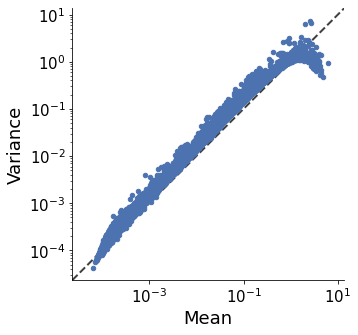

In [ ]:
#figsize(5,5)
smtx=ad.X.copy()
cmean = np.array(smtx.mean(0))
cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
#A
plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')

In [ ]:
ads={}

INFO:root:The dimensions of this data are (10, 27826).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/adult-testis/ [0.666182 1.345569 0.666182 ... 2.513368 1.56489  4.987794]


100%|██████████| 10/10 [00:00<00:00, 1509.18it/s]


[1. 3. 1. ... 1. 2. 1.]


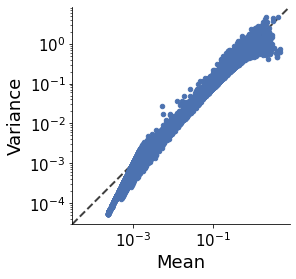

INFO:root:The dimensions of this data are (10, 19746).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/aging-brain/ [2.3710601 2.3710601 2.3710601 ... 2.1570113 2.1570113 2.1570113]


100%|██████████| 10/10 [00:00<00:00, 1526.31it/s]


[ 1.  1.  1. ...  1. 14.  1.]


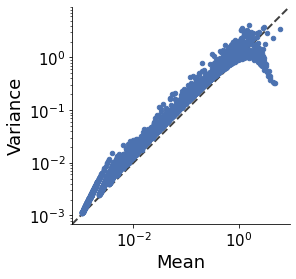

INFO:root:The dimensions of this data are (10, 36501).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
INFO:root:denormlizing ...the base is 2


data/cellbrowserdatasets/autism/ [3.7990766 3.7990766 3.7990766 ... 2.7960377 2.7960377 2.7960377]


100%|██████████| 10/10 [00:00<00:00, 1573.67it/s]


[1. 1. 1. ... 1. 1. 1.]


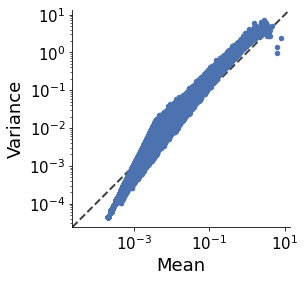

INFO:root:The dimensions of this data are (10, 25587).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/brain-dronc-seq/ [1.64661  1.64661  2.60772  ... 2.923464 2.923464 2.923464]


100%|██████████| 10/10 [00:00<00:00, 1586.95it/s]

[1. 1. 3. ... 1. 1. 1.]


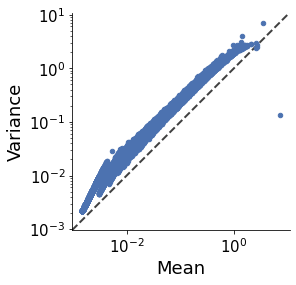

INFO:root:The dimensions of this data are (10, 2000).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/cbl-dev/ [1.3392093  0.06876045 0.00570326 ... 0.6931472  0.6931472  0.6931472 ]
[ 1.3392093   0.06876045  0.00570326 ...  0.16840176  0.03840306
 -0.07386914]


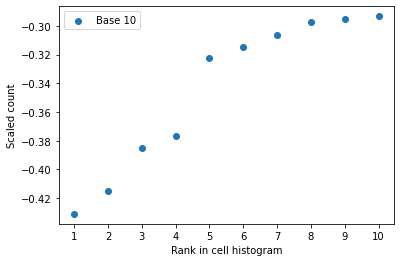

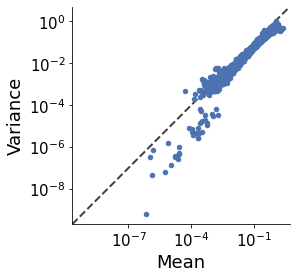

INFO:root:The dimensions of this data are (10, 33694).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/colorectal-cancer/ [0.23333012 0.23333012 0.23333012 ... 1.3287276  1.3287276  1.3287276 ]


100%|██████████| 10/10 [00:00<00:00, 1376.94it/s]

[1. 1. 1. ... 1. 2. 2.]


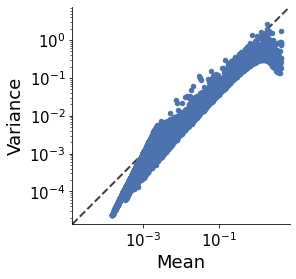

INFO:root:The dimensions of this data are (10, 56865).
INFO:root:select base
/home/huang_yin/github/sc/scDenorm/scDenorm/denorm.py:120: RuntimeWarning: overflow encountered in power
  x=base**x-cont
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/cortex-dev/ [9.1457159e+02 5.4430687e-01 6.1874078e+02 ... 1.2169891e+02 6.0849457e+02
 6.0849457e+02]
[9.1457159e+02 5.4430687e-01 6.1874078e+02 ... 4.1123013e+01 2.8557646e-01
 5.5687413e+00]


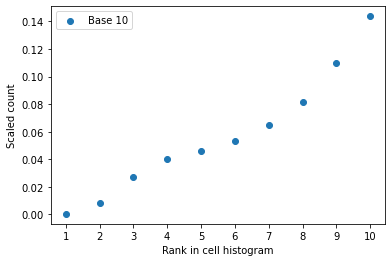

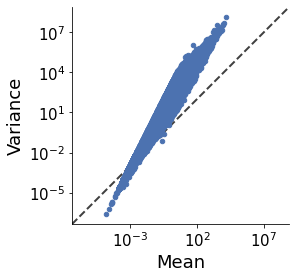

INFO:root:The dimensions of this data are (10, 18670).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/covid19-cytokine-storm/ [ 0.7035573   0.7035573   1.4018692  ...  0.0419248   0.09978624
 -0.08036495]


100%|██████████| 10/10 [00:00<00:00, 1472.00it/s]


[ 1.  1.  3. ... 98. 30. 56.]


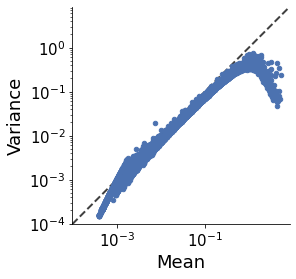

data/cellbrowserdatasets/covid19-pbmc/


/tmp/ipykernel_57119/1808468207.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f'{folder}/meta.tsv', sep="\t",index_col=0)
INFO:root:The dimensions of this data are (10, 26361).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/covid19-periph-immuno/ [0.6931472 0.6931472 1.791759  ... 0.6931472 0.6931472 0.6931472]


100%|██████████| 10/10 [00:00<00:00, 1586.95it/s]


[1. 1. 5. ... 1. 1. 1.]


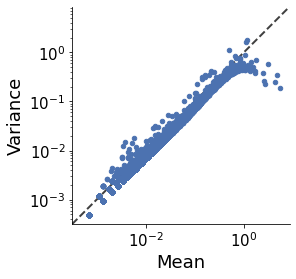

In [ ]:
for i in paths[:10]:
    try:
        ad=read_cellbrowser(i)
        ad=ad[:min(ad.shape[0],1000)]
        ads[i.split('/')[-2]]=ad
        ad1=scdenorm(ad[:10],verbose=1)
        print(ad1.X.data)
        #figsize(5,5)
        smtx=ad.X.copy()
        cmean = np.array(smtx.mean(0))
        cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
        #A
        plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')
        plt.show()
    except:
        print(i)

In [ ]:
ads

{'adult-testis': View of AnnData object with n_obs × n_vars = 1000 × 27826
     obs: 'CellType', 'Source', 'UMI Count', 'log1p_n_counts', 'Expressed Genes', 'log1p_n_genes', 'Percent Mitochond.', 'percent_ribo', 'percent_hb', 'percent_top50',
 'aging-brain': View of AnnData object with n_obs × n_vars = 1000 × 19746
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'Batch', 'Age', 'Celltype', 'Subtype', 'RNA_snn_res.1.6', 'seurat_clusters', 'Cluster',
 'autism': View of AnnData object with n_obs × n_vars = 1000 × 36501
     obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent',
 'brain-dronc-seq': View of AnnData object with n_obs × n_vars = 1000 × 25587
     obs: 'CellType', 'UMI Count', 'log1p_n_counts', 'Expressed Genes', 'log1p_n_genes', 'Percent Mitochond.', 'percent_ribo', 'per

In [ ]:
with open('data/results/ucb_0.pickle', 'wb') as handle:
    pickle.dump(ads, handle, protocol=pickle.HIGHEST_PROTOCOL)

data/cellbrowserdatasets/dros-olfac/
data/cellbrowserdatasets/early-brain/


/tmp/ipykernel_57119/1808468207.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f'{folder}/meta.tsv', sep="\t",index_col=0)
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


data/cellbrowserdatasets/ext-mouse-atlas/ [-0.2795687 -0.148852  -0.1771328 ...  1.536715   0.1567483 -1.006069 ]
data/cellbrowserdatasets/ext-mouse-atlas/


INFO:root:The dimensions of this data are (10, 26349).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/fetal-liver/ [0.9316514 0.9316514 0.9316514 ... 0.2830823 0.5034559 0.6839265]


100%|██████████| 10/10 [00:00<00:00, 1402.17it/s]


[2. 2. 2. ... 1. 1. 1.]


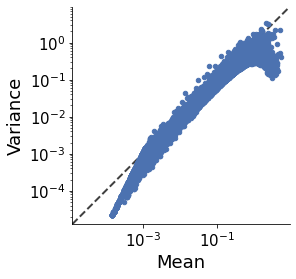

INFO:root:The dimensions of this data are (10, 23832).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/fetal-lung/ [1.020855  1.020855  1.020855  ... 0.6704464 0.6704464 0.6704464]


100%|██████████| 10/10 [00:00<00:00, 1396.10it/s]


[ 1.  1.  1. ...  2. 11.  1.]


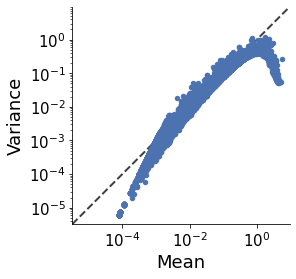

/tmp/ipykernel_57119/1808468207.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f'{folder}/meta.tsv', sep="\t",index_col=0)
INFO:root:The dimensions of this data are (10, 17676).
INFO:root:select base
/home/huang_yin/github/sc/scDenorm/scDenorm/denorm.py:120: RuntimeWarning: overflow encountered in power
  x=base**x-cont
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.


data/cellbrowserdatasets/gbm/ [265.31387  79.593   163.98515 ... 786.32275 782.63965 576.1589 ]


ERROR:root:Denormlization has failed. Output the orignal data


[ 265.31387    79.593     163.98515  ...   50.784935 2179.5742
  363.3184  ]


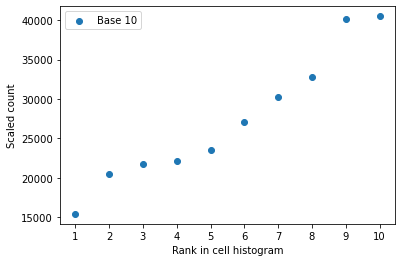

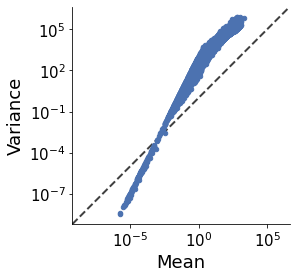

data/cellbrowserdatasets/gtex8/ [8.764e+00 7.187e-02 6.621e-02 ... 2.774e+04 3.304e+00 6.413e-01]


INFO:root:The dimensions of this data are (10, 56200).
INFO:root:select base
/home/huang_yin/github/sc/scDenorm/scDenorm/denorm.py:120: RuntimeWarning: overflow encountered in power
  x=base**x-cont
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


[8.764e+00 7.187e-02 6.621e-02 ... 3.898e+03 1.022e+01 9.159e+03]


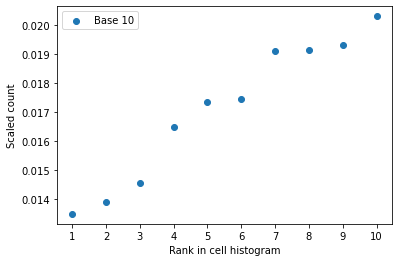

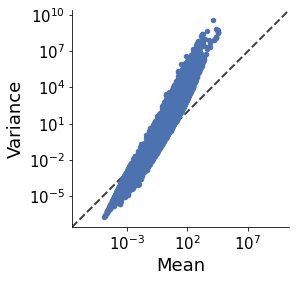

INFO:root:The dimensions of this data are (10, 23045).
INFO:root:select base
/home/huang_yin/github/sc/scDenorm/scDenorm/denorm.py:120: RuntimeWarning: overflow encountered in power
  x=base**x-cont
ERROR:root:The base 2.718281828459045 is not match with the data.
INFO:root:denormlizing ...the base is 1


data/cellbrowserdatasets/h1-esc-diff/ [2.27130e+02 2.02000e+00 8.58500e+01 ... 7.16857e+03 1.86000e+00
 2.68260e+02]


100%|██████████| 10/10 [00:00<00:00, 976.74it/s]

[2.27130e+04 2.02000e+02 8.58500e+03 ... 7.87400e+03 5.47400e+03
 5.27384e+05]


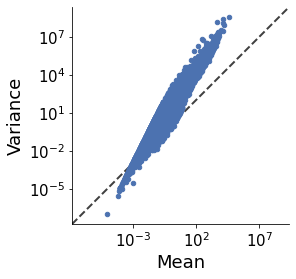

INFO:root:The dimensions of this data are (10, 20348).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/head-neck/ [ 1.91421     0.6914939  -0.4502993  ...  1.250272    1.282178
 -0.06480177]
[ 1.91421     0.6914939  -0.4502993  ...  1.038867    0.8310316
 -0.06480177]


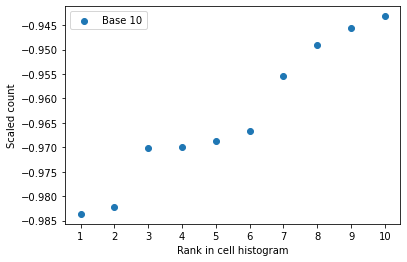

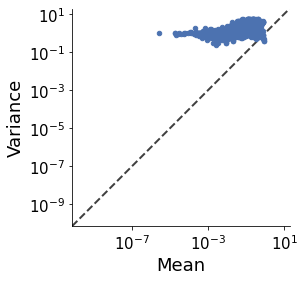

INFO:root:The dimensions of this data are (10, 3000).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/healthy-bal/ [-2.7911165   3.6147475  -0.536348   ... -0.6333982  -0.08749031
 -0.6832576 ]
[-2.7911165   3.6147475  -0.536348   ... -0.26002434 -0.35473302
  0.94446486]


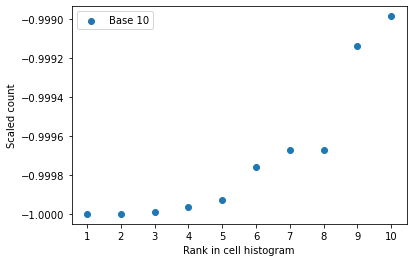

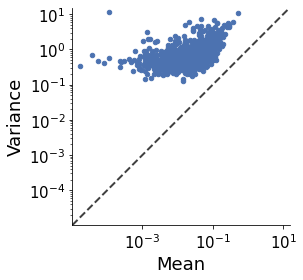

In [ ]:
for i in paths[10:20]:
    try:
        ad=read_cellbrowser(i)
        ad=ad[:min(ad.shape[0],1000)]
        ads[i.split('/')[-2]]=ad
        ad1=scdenorm(ad[:10],verbose=1)
        print(ad1.X.data)
        #figsize(5,5)
        smtx=ad.X.copy()
        cmean = np.array(smtx.mean(0))
        cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
        #A
        plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')
        plt.show()
    except:
        print(i)

In [ ]:
with open('data/results/ucb_1.pickle', 'wb') as handle:
    pickle.dump(ads, handle, protocol=pickle.HIGHEST_PROTOCOL)

INFO:root:The dimensions of this data are (10, 19798).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/hpsc-embryo-model/ [0.57158357 1.5800806  0.57158357 ... 0.3497465  0.3497465  0.3497465 ]


100%|██████████| 10/10 [00:00<00:00, 1325.30it/s]

[ 1.  5.  1. ...  2. 20. 71.]


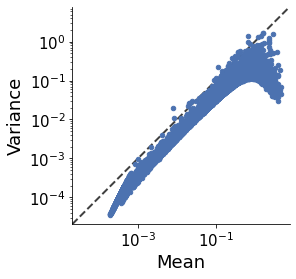

INFO:root:The dimensions of this data are (10, 1772).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-cellular-landscape/ [3.469741 2.807244 3.68664  ... 3.138752 3.138752 3.809993]


100%|██████████| 10/10 [00:00<00:00, 1640.77it/s]


[ 4.  2.  5.  1.  1.  1.  4.  5.  3.  2.  2.  4.  1.  1.  1.  1.  1.  6.
  2.  1.  2.  2.  2.  1.  1.  1.  2.  1.  1.  4.  3.  1.  1.  4.  2.  3.
  1.  4.  1. 10.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1. 13.  5.  1.
  1.  1.  3.  4.  9.  1.  1.  1.  1.  1.  4.  1.  3.  1.  1.  1.  2.  7.
  9.  1.  1.  1.  2.  2.  2.  1.  4.  2.  1.  1.  8. 10.  1.  2.  1.  3.
  3.  2.  1.  1. 14.  3.  1. 16.  1.  1.  3.  1.  1.  4.  2.  1.  1.  1.
  3.  1.  1.  1.  2.  2.  2.  2.  3.  1.  1.  1.  4.  1.  1.  1.  2.  1.
  1.  1.  4.  2.  2.  2.  2.  1.  1.  5.  1.  1.  2.  1.  3.  1.  1.  1.
  1.  1.  2.  1.  4.  1.  3.  3.  1.  8.  5.  1.  6.  1.  1.  2.  1.  1.
  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  1.  2.  2.  1.  1.  1.
  3.  1.  3.  3.  2.  4.  2.  1.  1.  3.  6.  1.  1.  1.  6. 15.  4.  2.
  1.  1.  1.  1.  1.  1.  1.  3.  1.  3.  1.  1.  1.  3.  4.  3.  2.  2.
  4.  1.  1.  2.  3.  1.  5.  1.  1.  1.  2.  2.  1.  2.  3.  1.  1.  1.
  2.  4.  2.  2.  2.  4.  6.  1.  2.  1.  1.  1.  3

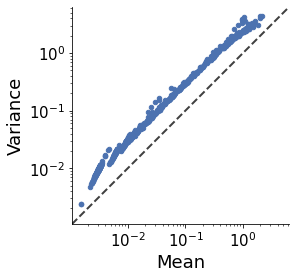

INFO:root:The dimensions of this data are (10, 33538).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-cornea/ [0.4102722 0.4102722 1.1082035 ... 4.154049  2.698028  4.584487 ]


100%|██████████| 10/10 [00:00<00:00, 1373.47it/s]

[  1.   1.   4. ...   4. 126.   1.]


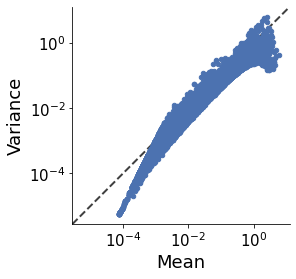

INFO:root:The dimensions of this data are (10, 19791).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-epidermis/ [0.6057951 0.6057951 1.252228  ... 3.653415  2.020252  3.61014  ]


100%|██████████| 10/10 [00:00<00:00, 1456.46it/s]


[ 1.  1.  3. ...  7.  1. 32.]


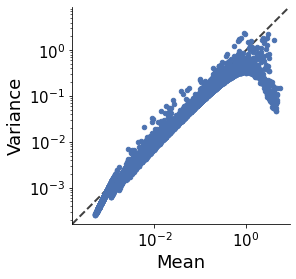

INFO:root:The dimensions of this data are (10, 21599).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-fovea-periphery/ [2.4052   2.4052   2.4052   ... 1.870027 1.870027 1.320218]


100%|██████████| 10/10 [00:00<00:00, 1574.32it/s]

[ 1.  1.  1. ... 59. 21. 66.]


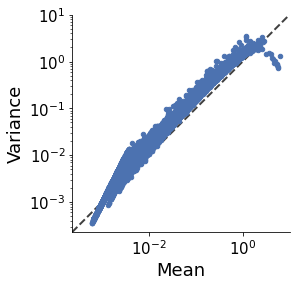

INFO:root:The dimensions of this data are (10, 21).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-gallbladder/ [1.098612  1.098612  1.098612  ... 1.098612  0.6931472 1.098612 ]


100%|██████████| 10/10 [00:00<00:00, 1736.63it/s]

[ 1.  1.  1.  3.  4.  2.  2.  1.  3.  1.  3.  3.  1.  1.  3.  3.  8.  5.
  4.  5.  7. 17.  2.  3.  4.  1. 17.  4.  1. 23.  2. 12.  4.  2.  9. 34.
  1.  4. 11.  1.  1.  1.  1.  3.  5.  2.  8.  2.  2.  9. 22.  2.  2.  3.
  1.  1.  2.  1.  1.  2.  3.  1.  4.  7.  1.  1. 12. 13.  7.  8.  2.  7.
 14.  1.  4. 10.  1.  1.  4.  1.  1.  1.  1.  1.]


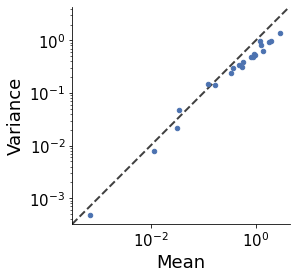

INFO:root:The dimensions of this data are (10, 17180).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-hippo-axis/ [2.1624384 3.181254  2.7963428 ... 1.8351269 2.4451137 1.8351269]


100%|██████████| 10/10 [00:00<00:00, 1527.48it/s]


[1. 3. 2. ... 1. 2. 1.]


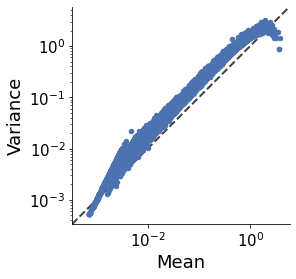

INFO:root:The dimensions of this data are (10, 22340).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-ileum/ [2.342511 1.74111  1.74111  ... 3.222146 1.38885  2.568094]


100%|██████████| 10/10 [00:00<00:00, 1605.78it/s]


[2. 1. 1. ... 3. 3. 6.]


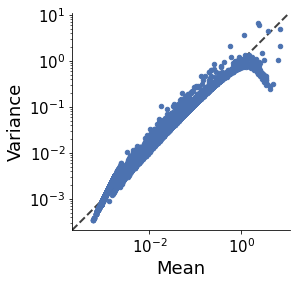

INFO:root:The dimensions of this data are (10, 20007).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
INFO:root:denormlizing ...the base is 2


data/cellbrowserdatasets/human-liver/ [0.8361646 0.8361646 1.362103  ... 6.275868  2.882419  5.407014 ]


100%|██████████| 10/10 [00:00<00:00, 1548.80it/s]

[ 1.  1.  2. ... 41. 13. 24.]


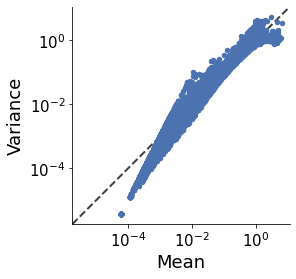

INFO:root:The dimensions of this data are (10, 16077).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/human-pancreas/ [0.5112793 0.847946  0.5112793 ... 2.225449  1.634875  1.634875 ]


100%|██████████| 10/10 [00:00<00:00, 1446.71it/s]

[1. 2. 1. ... 1. 1. 1.]


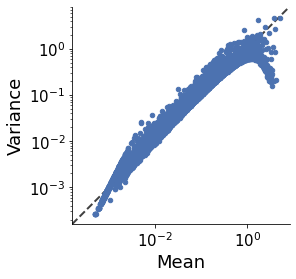

In [ ]:
for i in paths[20:30]:
    try:
        ad=read_cellbrowser(i)
        ad=ad[:min(ad.shape[0],1000)]
        ads[i.split('/')[-2]]=ad
        ad1=scdenorm(ad[:10],verbose=1)
        print(ad1.X.data)
        #figsize(5,5)
        smtx=ad.X.copy()
        cmean = np.array(smtx.mean(0))
        cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
        #A
        plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')
        plt.show()
    except:
        print(i)

In [ ]:
with open('data/results/ucb_2.pickle', 'wb') as handle:
    pickle.dump(ads, handle, protocol=pickle.HIGHEST_PROTOCOL)

INFO:root:The dimensions of this data are (10, 26550).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
INFO:root:denormlizing ...the base is 1


data/cellbrowserdatasets/klein-xenopus/ [ 0.707712  0.12489   0.430178 ...  9.87654  19.7531    9.87654 ]


100%|██████████| 10/10 [00:01<00:00,  9.40it/s]


[ 51.   9.  31. ...  19. 134. 112.]


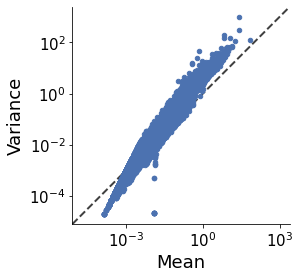

INFO:root:The dimensions of this data are (10, 22484).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/living-donor-kidney/ [0.6931472 0.6931472 0.6931472 ... 0.6931472 2.0794415 0.6931472]


100%|██████████| 10/10 [00:00<00:00, 1508.85it/s]


[ 1.  1.  1. ... 11.  3. 71.]


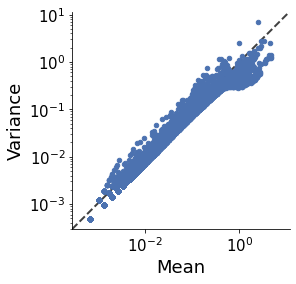

INFO:root:The dimensions of this data are (10, 17863).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/ln-mono-dc/ [0.6931472 0.6931472 0.6931472 ... 0.6931472 2.8903718 1.0986123]


100%|██████████| 10/10 [00:00<00:00, 1467.00it/s]

[1. 1. 1. ... 1. 7. 1.]


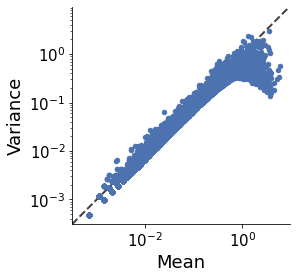

INFO:root:The dimensions of this data are (10, 15171).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/lung-interstitial-macrophage/ [0.6931472 3.0445225 0.6931472 ... 2.7080503 1.3862944 1.0986123]


100%|██████████| 10/10 [00:00<00:00, 1512.71it/s]

[ 1. 20.  1. ...  2.  1.  2.]


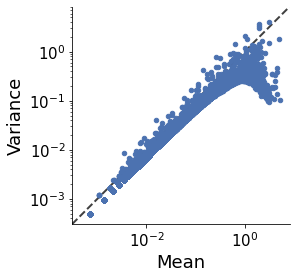

INFO:root:The dimensions of this data are (10, 20952).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/lung-smoking-effect/ [1.0986123 1.3862944 1.3862944 ... 0.6931472 1.609438  0.6931472]


100%|██████████| 10/10 [00:00<00:00, 1306.15it/s]


[2. 3. 3. ... 1. 1. 1.]


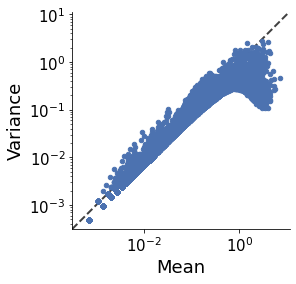

INFO:root:The dimensions of this data are (10, 3005).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/mouse-cell-atlas/ [1.697213  2.380394  0.6374983 ... 3.036935  3.705799  3.036935 ]


100%|██████████| 10/10 [00:00<00:00, 1628.79it/s]

[ 5. 11.  1. ... 36.  3.  8.]


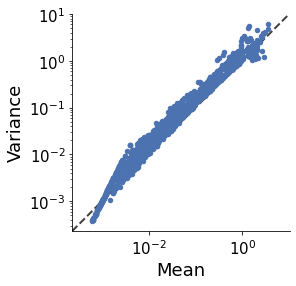

INFO:root:The dimensions of this data are (10, 14498).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/mouse-dev-neocortex/ [1.3554553  2.2654624  1.3554553  ... 1.3845718  0.91491294 0.91491294]


100%|██████████| 10/10 [00:00<00:00, 1577.81it/s]

[1. 3. 1. ... 1. 1. 1.]


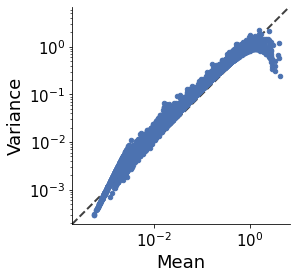

INFO:root:The dimensions of this data are (10, 14389).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/mouse-esophagus/ [2.364048  2.364048  2.364048  ... 1.6852267 1.6852267 1.6852267]


100%|██████████| 10/10 [00:00<00:00, 1606.89it/s]

[1. 1. 1. ... 1. 1. 1.]


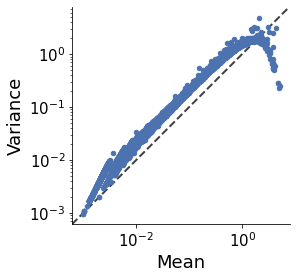

INFO:root:The dimensions of this data are (10, 2000).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/mouse-hypothalamus-dev/ [ 6.7063947e-03  2.9529693e+00  4.7789249e-01 ... -4.3631960e-03
 -1.4004059e-03 -1.5522812e-02]
[ 0.00670639  2.9529693   0.4778925  ... -0.13263535 -0.01496694
 -0.00366637]


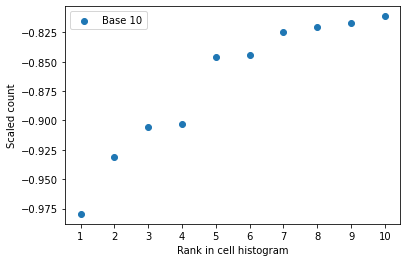

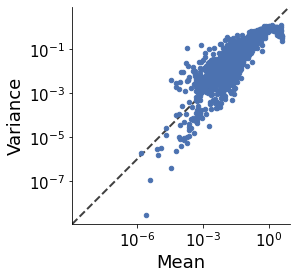

INFO:root:The dimensions of this data are (10, 17275).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/mouse-osteoblasts/ [1.443774  2.511896  1.443774  ... 0.7194691 3.094077  0.7194691]


100%|██████████| 10/10 [00:00<00:00, 1464.54it/s]

[ 2.  7.  2. ... 17.  1.  4.]


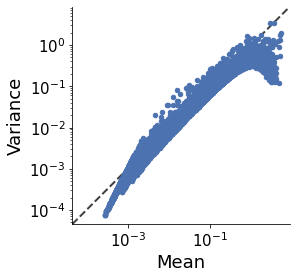

In [ ]:
for i in paths[30:40]:
    try:
        ad=read_cellbrowser(i)
        ad=ad[:min(ad.shape[0],1000)]
        ads[i.split('/')[-2]]=ad
        ad1=scdenorm(ad[:10],verbose=1)
        print(ad1.X.data)
        #figsize(5,5)
        smtx=ad.X.copy()
        cmean = np.array(smtx.mean(0))
        cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
        #A
        plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')
        plt.show()
    except:
        print(i)

In [ ]:
with open('data/results/ucb_3.pickle', 'wb') as handle:
    pickle.dump(ads, handle, protocol=pickle.HIGHEST_PROTOCOL)

INFO:root:The dimensions of this data are (10, 299).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


data/cellbrowserdatasets/mouse-skin-stretch/ [0.010547   0.02032307 0.02468075 ... 0.00525864 0.00303626 0.01525049]
[0.010547   0.02032307 0.02468075 ... 0.09439185 0.04184676 0.0094057 ]


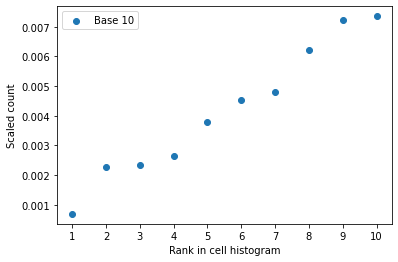

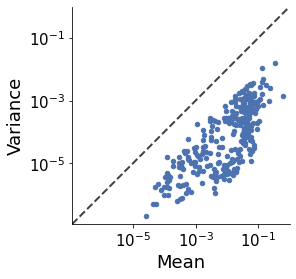

INFO:root:The dimensions of this data are (10, 33741).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
INFO:root:denormlizing ...the base is 2


data/cellbrowserdatasets/ms/ [1.05065 1.05065 1.05065 ... 2.31274 2.31274 2.31274]


100%|██████████| 10/10 [00:00<00:00, 1395.59it/s]


[1. 1. 1. ... 2. 1. 2.]


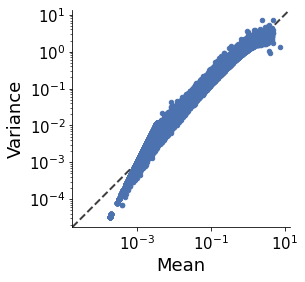

data/cellbrowserdatasets/myeloid-neuroinflam/


INFO:root:The dimensions of this data are (10, 2000).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.


data/cellbrowserdatasets/organoidatlas/ [0.06577537 1.4290388  0.0105743  ... 0.00724421 0.46095085 0.01325276]


ERROR:root:Denormlization has failed. Output the orignal data


[0.06577537 1.4290388  0.0105743  ... 0.05850365 0.3614425  0.01352579]


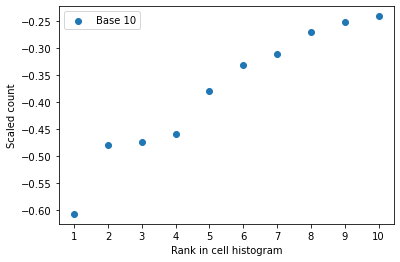

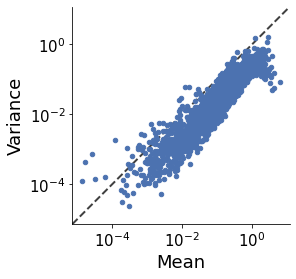

INFO:root:The dimensions of this data are (10, 22875).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/prostate-prostatic-urethra/ [1.342148 1.342148 1.342148 ... 1.184835 1.184835 1.184835]


100%|██████████| 10/10 [00:00<00:00, 1562.24it/s]

[1. 1. 1. ... 1. 1. 1.]


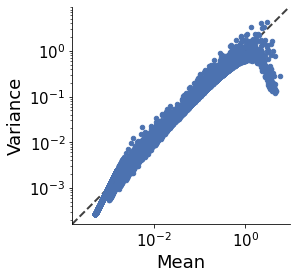

INFO:root:The dimensions of this data are (10, 21040).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/retinal-pigment-epi/ [1.923451  1.923451  1.923451  ... 2.186453  0.6871025 4.146947 ]


100%|██████████| 10/10 [00:00<00:00, 1309.45it/s]

[ 1.  1.  1. ... 35. 12. 47.]


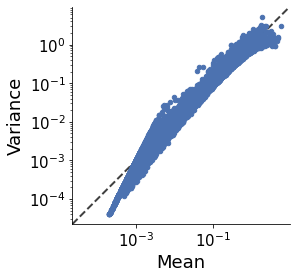

INFO:root:The dimensions of this data are (10, 21823).
INFO:root:select base
INFO:root:denormlizing ...the base is 2.718281828459045


data/cellbrowserdatasets/sea-urchin-dev/ [0.5930254  0.5930254  0.96275777 ... 1.4180137  1.4180137  1.4180137 ]


100%|██████████| 10/10 [00:00<00:00, 1322.87it/s]


[1. 1. 2. ... 1. 1. 2.]


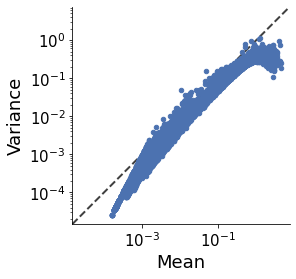

INFO:root:The dimensions of this data are (10, 19972).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
INFO:root:denormlizing ...the base is 2


data/cellbrowserdatasets/zeisel2015/ [2.    2.    1.    ... 1.    1.    1.585]


100%|██████████| 10/10 [00:00<00:00, 1451.52it/s]

[3. 3. 1. ... 2. 3. 3.]


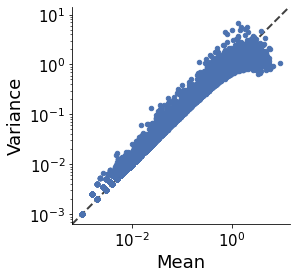

In [ ]:
for i in paths[40:]:
    try:
        ad=read_cellbrowser(i)
        ad=ad[:min(ad.shape[0],1000)]
        ads[i.split('/')[-2]]=ad
        ad1=scdenorm(ad[:10],verbose=1)
        print(ad1.X.data)
        #figsize(5,5)
        smtx=ad.X.copy()
        cmean = np.array(smtx.mean(0))
        cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
        #A
        plot_mv(cmean,cvar,c='#4C72B0')#,fit=True,save='figures/pbmc_mvsv_raw_count.pdf')
        plt.show()
    except:
        print(i)

In [ ]:
with open('data/results/ucb_all.pickle', 'wb') as handle:
    pickle.dump(ads, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
ads

{'adult-testis': View of AnnData object with n_obs × n_vars = 1000 × 27826
     obs: 'CellType', 'Source', 'UMI Count', 'log1p_n_counts', 'Expressed Genes', 'log1p_n_genes', 'Percent Mitochond.', 'percent_ribo', 'percent_hb', 'percent_top50',
 'aging-brain': View of AnnData object with n_obs × n_vars = 1000 × 19746
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'Batch', 'Age', 'Celltype', 'Subtype', 'RNA_snn_res.1.6', 'seurat_clusters', 'Cluster',
 'autism': View of AnnData object with n_obs × n_vars = 1000 × 36501
     obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent',
 'brain-dronc-seq': View of AnnData object with n_obs × n_vars = 1000 × 25587
     obs: 'CellType', 'UMI Count', 'log1p_n_counts', 'Expressed Genes', 'log1p_n_genes', 'Percent Mitochond.', 'percent_ribo', 'per

# Total sum

In [ ]:
ads=[]
for i in range(5):
    with open(f'data/results/ucb_{i}.pickle', 'rb') as handle:
        ads+=pickle.load(handle)

In [ ]:
len(ads)

43

In [ ]:
total_sum=[]
for i in [0,1,3,5,7,9,13,20,21,22,23,24,25,26,27,28,29]:
    print(i)
    smtx1=ads[i].X.copy()
    smtx1.data=np.exp(smtx1.data)-1
    total_sum.append(pd.DataFrame(smtx1.sum(axis=1)))

0
1
3
5
7
9
13
20
21
22
23
24
25
26
27
28
29


/tmp/ipykernel_57119/3848539932.py:5: RuntimeWarning: overflow encountered in exp
  smtx1.data=np.exp(smtx1.data)-1


In [ ]:
total_sum=pd.concat(total_sum)

In [ ]:
total_sum.columns=['total']

In [ ]:
total_sum['name']=[x for x in ['1','3','4','5','6'] for i in range(1000)]

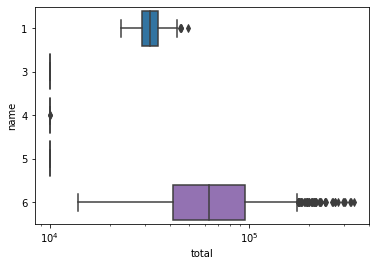

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(data=total_sum,y='name',x='total',ax=ax)
ax.set_xscale("log", base=10)

In [ ]:
ads[6].X.data

array([2., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
df = pd.read_csv(f'{exp_paths[0]}/exprMatrix.tsv.gz', sep='\t', index_col=0)

In [ ]:
df=df.T

In [ ]:
df

gene,ENSG00000238009|RP11-34P13.7,ENSG00000279457|FO538757.2,ENSG00000228463|AP006222.2,ENSG00000237094|RP4-669L17.10,ENSG00000230021|RP5-857K21.4,ENSG00000237491|RP11-206L10.9,ENSG00000177757|FAM87B,ENSG00000225880|LINC00115,ENSG00000230368|FAM41C,ENSG00000230699|RP11-54O7.1,...,ENSG00000274847|AC145212.2,ENSG00000276256|AC011043.1,ENSG00000273748|AL592183.1,ENSG00000278817|AC007325.4,ENSG00000277196|AC007325.2,ENSG00000278384|AL354822.1,ENSG00000276345|AC004556.1,ENSG00000277856|AC233755.2,ENSG00000275063|AC233755.1,ENSG00000271254|AC240274.1
AAACATACCAACTG-1-68,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACCTTACT-1-68,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACGGATTC-1-68,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.939841,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCAAA-1-68,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGTAGCGT-1-68,0.0,1.090938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGGACAC-1-208,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTCGGATCC-1-208,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTGCGATAG-1-208,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCATTGCCC-1-208,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.iloc[0,:].value_counts()

0.0000    15124
1.0000     1691
1.5850      941
2.0000      684
2.3219      356
          ...  
7.4346        1
6.3750        1
7.2384        1
8.7039        1
5.7814        1
Name: 1772071015-C02, Length: 69, dtype: int64

[<matplotlib.lines.Line2D>]

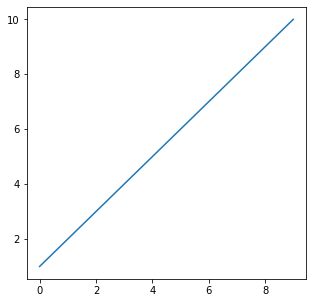

In [ ]:
plt.plot(2**(df.iloc[0,:].value_counts().index[:10]))

In [ ]:
df = pd.read_csv('data/realdata/GSE60361_C1-3005-Expression.txt.gz', sep='\t', index_col=0)

In [ ]:
df=df.T

In [ ]:
df

cell_id,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Gm20826_loc1,Gm20826_loc2,Gm20877_loc2,Gm20877_loc1,Gm20865_loc4,Gm20738_loc4,Gm20738_loc6,Gm21943_loc1,Gm21943_loc3,Gm20738_loc3
1772071015_C02,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_G12,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_A05,0,0,6,0,1,0,2,25,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071014_B06,3,2,4,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1772067065_H06,0,2,1,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772067059_B04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066097_D04,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1772063068_D01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066098_A12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[0,:].value_counts()

0      15124
1       1691
2        941
3        684
4        356
       ...  
172        1
82         1
150        1
416        1
54         1
Name: 1772071015_C02, Length: 69, dtype: int64

[<matplotlib.lines.Line2D>]

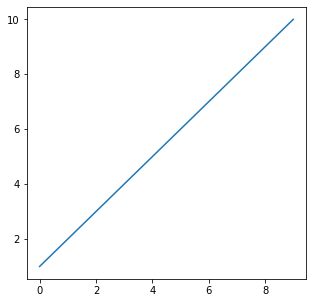

In [ ]:
plt.plot(2**(df.iloc[0,:].value_counts().index[:10]))